In [1]:
!pip3 install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

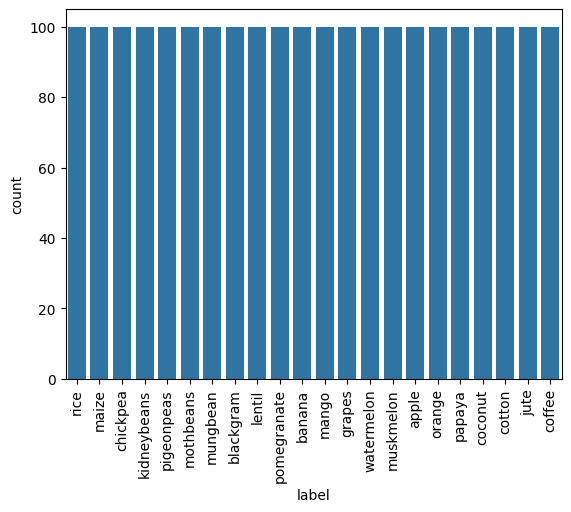

In [6]:
fert_count = sns.countplot(data=df, x='label')
plt.xticks(rotation=90)
None

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: >

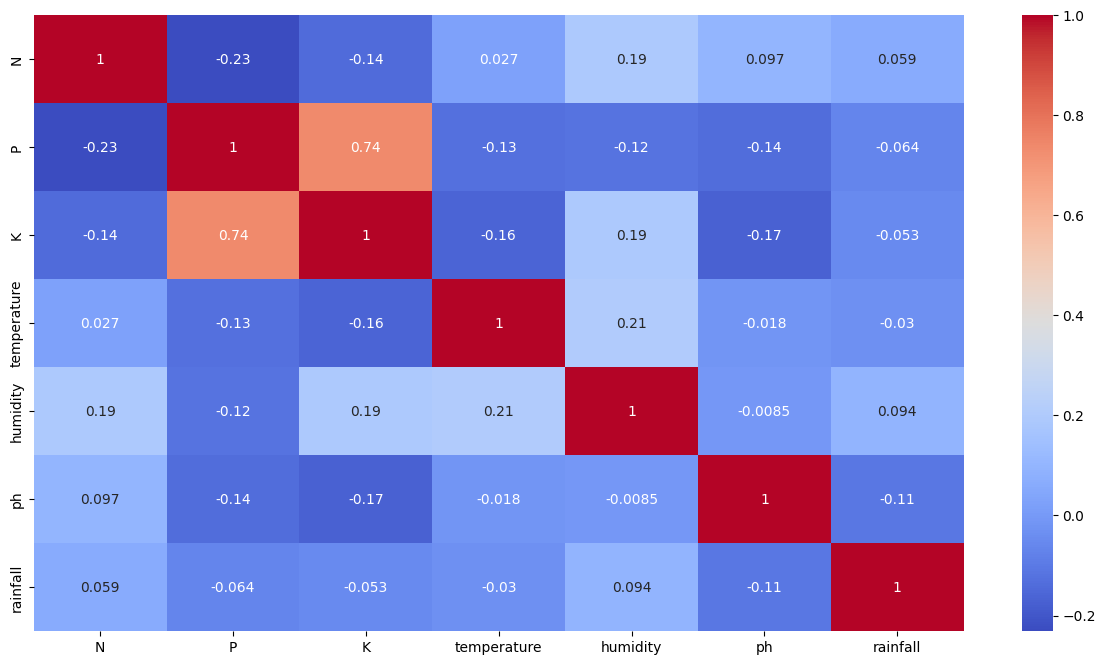

In [9]:
plt.figure(figsize = (15,8))
my_df = df.select_dtypes(exclude=[object])
sns.heatmap(my_df.corr(), annot=True, cmap="coolwarm")

In [10]:
features = ['N', 'P', 'temperature', 'humidity', 'ph']
X = df.drop(columns=['label'])[features]
X

,N,P,temperature,humidity,ph
0,90,42,20.879744,82.002744,6.502985
1,85,58,21.770462,80.319644,7.038096
2,60,55,23.004459,82.320763,7.840207
3,74,35,26.491096,80.158363,6.980401
4,78,42,20.130175,81.604873,7.628473
...,...,...,...,...,...
2195,107,34,26.774637,66.413269,6.780064
2196,99,15,27.417112,56.636362,6.086922
2197,118,33,24.131797,67.225123,6.362608
2198,117,32,26.272418,52.127394,6.758793


In [11]:
y = df[['label']]

In [12]:
X.shape, y.shape

((2200, 5), (2200, 1))

In [13]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse_output=False, dtype='int')
# encoded_y = ohe.fit_transform(y)
# encoded_y

In [14]:
# columns = ohe.get_feature_names_out()
# y = pd.DataFrame(encoded_y, columns=columns)
# y

In [15]:
y.shape

(2200, 1)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
le.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [20]:
X_train.shape, X_test.shape

((1760, 5), (440, 5))

In [21]:
y_train.shape, y_test.shape

((1760,), (440,))

In [22]:
# ##Baselines
# from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification


# lr = LogisticRegression(random_state=999, multi_class='multinomial')

# lr.fit(X_train, y_train)

In [23]:
# !pip3 install --upgrade -r requirements.txt

In [24]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://157.230.38.70:5000/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "myo"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="mth_crop_recommendation")

<Experiment: artifact_location='mlflow-artifacts:/524048815272588434', creation_time=1701165615726, experiment_id='524048815272588434', last_update_time=1701167495053, lifecycle_stage='active', name='mth_crop_recommendation', tags={}>

In [25]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import mlflow
import mlflow.sklearn

# Assuming X_train and y_train are defined somewhere in your code

classifiers = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'param_grid': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(),
        'param_grid': {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.001, 0.01, 0.1],
            'n_estimators': [100, 200, 300],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
        }
    },
    # Add other classifiers as needed
}

experiment = 2
mlflow.start_run(run_name="crop_recommendation" + str(experiment))

for clf_name, clf_info in classifiers.items():
    clf = clf_info['model']
    param_grid = clf_info['param_grid']

    grid_search = GridSearchCV(clf, param_grid, cv=5)
    
    with mlflow.start_run(run_name=clf_name, nested=True):
        grid_search.fit(X_train, y_train)
        
        # Log best hyperparameters and corresponding metrics
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("accuracy", grid_search.best_score_)
        
        print(f"{clf_name} - Best Parameters: {grid_search.best_params_}, Best Accuracy: {grid_search.best_score_}")
        
        model = grid_search.best_estimator_
        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                            
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

best_classifier_name = max(classifiers, key=lambda k: grid_search.best_score_ if 'best_score_' in dir(grid_search) else 0)
best_classifier_info = classifiers[best_classifier_name]
best_model = GridSearchCV(best_classifier_info['model'], best_classifier_info['param_grid'], cv=5)
best_model.fit(X_train, y_train)

# Log the best model
# with mlflow.start_run(nested=True):
#     mlflow.sklearn.log_model(best_model, "model")
#     mlflow.log_params(best_model.best_params_)
#     mlflow.log_param("best_classifier", best_classifier_name)
#     print(f"The best classifier is {best_classifier_name} with hyperparameters {best_model.best_params_}.")

mlflow.end_run()


Random Forest - Best Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}, Best Accuracy: 0.9443181818181816


/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input) if model_input is not None else None


Support Vector Machine - Best Parameters: {'C': 10, 'gamma': 'scale'}, Best Accuracy: 0.8755681818181819


/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input) if model_input is not None else None
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, 

K-Nearest Neighbors - Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}, Best Accuracy: 0.8772727272727273


/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input) if model_input is not None else None
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, 

XGBoost - Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}, Best Accuracy: 0.9369318181818181


/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input) if model_input is not None else None
/Users/myothiha/.conda/envs/DeepRefLearn/lib/python3.8/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, 

In [26]:
# import numpy as np
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb

# classifiers = {
#     'Random Forest': RandomForestClassifier(),
#     'Support Vector Machine': SVC(),
#     # 'Logistic Regression': LogisticRegression(max_iter=1000),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'XGBoost': xgb.XGBClassifier(),
#     # Add other classifiers as needed
# }

# for clf_name, clf in classifiers.items():
#     scores = cross_val_score(clf, X_train, y_train, cv=5)  # Adjust cv value as needed
#     print(f"{clf_name}: Accuracy {np.mean(scores)} (+/- {np.std(scores)})")


# best_classifier_name = max(classifiers, key=lambda k: np.mean(cross_val_score(classifiers[k], X_train, y_train, cv=5)))
# model = classifiers[best_classifier_name]
# print(f"The best classifier is {best_classifier_name}.")

In [27]:
## Grid Search

In [28]:
# from multiprocessing import cpu_count
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Create the grid search
# rf_classifier = RandomForestClassifier()
# stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# grid = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=cpu_count())

# # Fit the grid search on the data
# grid.fit(X_train, y_train)

# # Print the best parameters
# print("Best parameters:", grid.best_params_)

# # Print the cross-validated accuracy
# print("Best cross-validated accuracy:", grid.best_score_)

# # Evaluate on the test set
# test_accuracy = grid.score(X_test, y_test)
# print("Test set accuracy:", test_accuracy)

In [29]:
# Evaluate the model on the test set
model = best_model

In [30]:
import pickle
model_file = open(b"models/crop.model","wb")
pickle.dump(model, model_file)

In [31]:
import pickle

# Open the file in binary mode for reading
with open(b"models/crop.model", "rb") as model_file:
    # Load the model from the file
    model = pickle.load(model_file)

## Testing Test Set

In [32]:
yhat = model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       0.89      1.00      0.94        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.78      0.78      0.78        23
           9       1.00      1.00      1.00        20
          10       0.79      1.00      0.88        11
          11       0.90      0.86      0.88        21
          12       0.90      1.00      0.95        19
          13       0.95      0.79      0.86        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       0.85      0.79      0.81        14
          17       1.00    

In [34]:
top3_yhat_test = model.predict_proba(X_test)

## Top 3 Accuracy

In [35]:
from sklearn.metrics import top_k_accuracy_score
top_k_accuracy_score(y_test, top3_yhat_test, k=3)

1.0